In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./geyser.csv')

In [3]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
f'Eruptions: {data.eruptions.min()} ~ {data.eruptions.max()}, mean: {data.eruptions.mean()}'

'Eruptions: 1.6 ~ 5.1, mean: 3.475390510948905'

In [5]:
f'Waiting: {data.waiting.min()} ~ {data.waiting.max()}, mean: {data.waiting.mean()}'

'Waiting: 5 ~ 96, mean: 70.60218978102189'

In [6]:
data[data.waiting < 20]

,eruptions,waiting
116,2.317,5


In [7]:
data.eruptions = data.eruptions.map(lambda x: float(x))
data.waiting = data.waiting.map(lambda x: float(x))

In [8]:
data = data[data.waiting > 5]

In [9]:
data.shape[0]

273

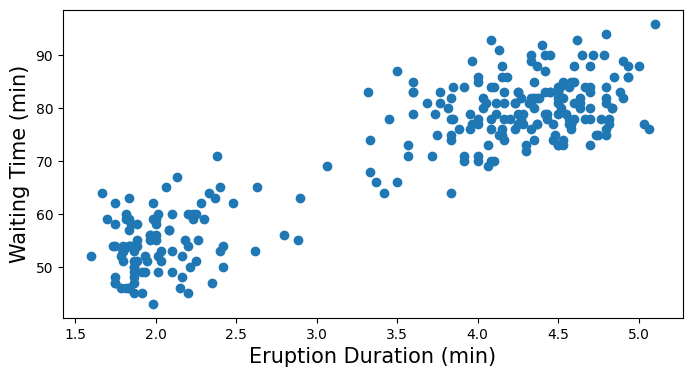

In [10]:
plt.figure(figsize=(8, 4))
plt.scatter(data['eruptions'], data['waiting'])
plt.xlabel('Eruption Duration (min)', fontsize=15)
plt.ylabel('Waiting Time (min)', fontsize=15)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

X = data['eruptions'].values.reshape(-1, 1)
y = data['waiting'].values

train_len = int(X.shape[0] * 0.8)

X_train = X[:train_len]
y_train = y[:train_len]

X_test = X[train_len:]
y_test = y[train_len:]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f'MSE: {mse}, R2: {r2}'

'MSE: 32.327776393843806, R2: 0.8213546735122057'

In [13]:
f'Waiting Time = {model.coef_[0]} * Eruption Duration + {model.intercept_}'

'Waiting Time = 10.557468718352968 * Eruption Duration + 34.21924216431968'